<a href="https://colab.research.google.com/github/Redwoods/Py/blob/master/py-ml-dl-tf/resnet/bear_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Creating our own dataset using Google Images
In this notebook we are creating our own dataset of teddy bear, black bear and grizzly bear and try to classify between them.We are going to use following javascript code to download the images from Google Images.

**javascript code**:

urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);

window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));






In [1]:
#importing the drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#importing the required packages
from fastai.vision import *
from fastai.metrics import error_rate

In [8]:
cd drive/My\ Drive

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks'
/content/drive/My Drive


In [9]:
cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [10]:
cd Examples/bear-classifier

/content/drive/My Drive/Colab Notebooks/Examples/bear-classifier


In [11]:
!pwd

/content/drive/My Drive/Colab Notebooks/Examples/bear-classifier


In [12]:
ls

bear_classifier.ipynb  blackbear.txt  grizzlybear.txt  README.md  teddybear.txt


In [0]:
#creating directory
path = Path('beardataset')
dest = path/'black'
dest.mkdir(parents = True, exist_ok = True)

dest = path/'teddy'
dest.mkdir(parents=True, exist_ok=True)

dest = path/'grizzly'
dest.mkdir(parents=True, exist_ok=True)


In [14]:
ls

bear_classifier.ipynb  blackbear.txt    README.md
beardataset/           grizzlybear.txt  teddybear.txt


In [0]:
#downloading images
download_images(path/'blackbear.txt', path/'black', max_pics = 250)
download_images(path/'teddybear.txt', path/'teddy', max_pics = 250)
download_images(path/'grizzlybear.txt', path/'grizzly', max_pics = 250)

In [0]:
#deleting corrupted images
classes = ['black','grizzly','teddy']

for c in classes:
  print(c)
  verify_images(path/c, delete = True, max_size = 500)

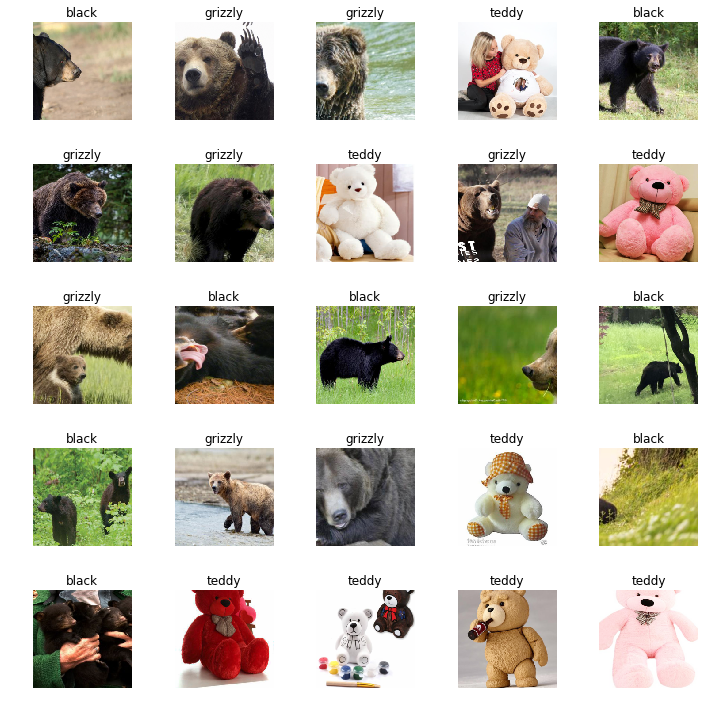

In [17]:
#view data
data = ImageDataBunch.from_folder(path, train='.', valid_pct = 0.2, seed=66,
                                  ds_tfms = get_transforms(), size = 224).normalize(imagenet_stats)
data.show_batch(rows = 5, figsize = (10,10))

In [18]:
print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))

['black', 'grizzly', 'teddy']
540
135


#Training
- transfer learning : resnet

In [19]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 170608951.54it/s]


In [20]:
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,error_rate,time
0,0.969692,0.549449,0.170370,00:08
1,0.600486,0.205835,0.059259,00:08
2,0.426709,0.228804,0.066667,00:08
3,0.332880,0.235001,0.066667,00:08
4,0.272960,0.202679,0.059259,00:08
5,0.226573,0.184187,0.074074,00:08
6,0.194905,0.178843,0.066667,00:08
7,0.168027,0.168725,0.059259,00:08
8,0.147273,0.166302,0.059259,00:08
9,0.132631,0.167017,0.059259,00:08


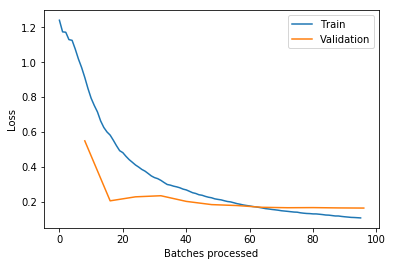

In [21]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


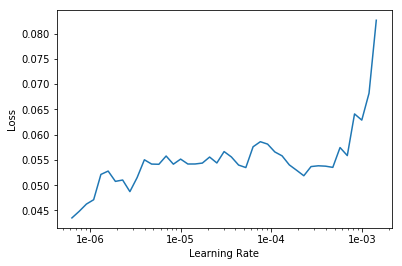

In [24]:
learn.lr_find()
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(3,max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.080081,0.151736,0.066667,00:09
1,0.059896,0.163753,0.051852,00:08
2,0.056441,0.181232,0.051852,00:09


This doesn't help much so we use the stage-1 training.
- Stage-1 is still good.

In [0]:
learn.save('stage-1')

#Interpretation

In [0]:
learn.load('stage-1');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

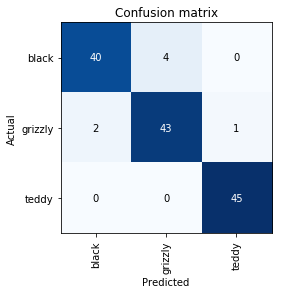

In [29]:
interp.plot_confusion_matrix()

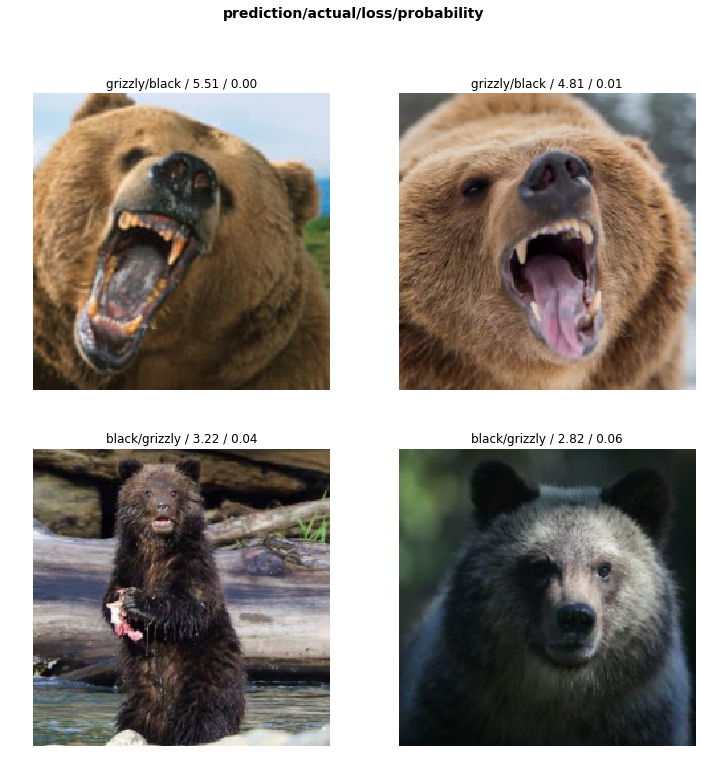

In [30]:
interp.plot_top_losses(k = 4, heatmap=False)

#Prediction

In [0]:
defaults.device = torch.device('cpu')

In [0]:
learn.export()

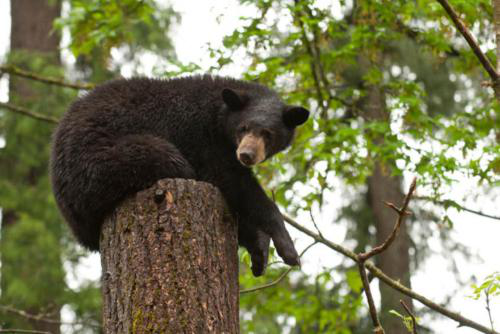

In [35]:
#example image
img = open_image(path/'black/00000246.jpg')
img

In [0]:
learn = load_learner(path)

In [37]:
pred,idx,outputs = learn.predict(img)
print('Predicted class: ',pred)

Predicted class:  black
